# Noise2Void - 3D Example

In [1]:
# We import all our dependencies.
from n2v.models import N2VConfig, N2V
import numpy as np
from csbdeep.utils import plot_history
from n2v.utils.n2v_utils import manipulate_val_data
from n2v.internals.N2V_DataGenerator import N2V_DataGenerator
from matplotlib import pyplot as plt
import urllib
import os
import zipfile

# Download Example Data
Thanks to Romina Piscitello (Eaton Lab, MPI-CBG) for letting us use her data.

# Training Data Preparation
For training we will load __one__ low-SNR 3D-tif-volume and use the <code>N2V_DataGenerator</code> to extract non-overlapping 3D-patches. Since N2V is a self-supervised method, we don't need targets.

In [2]:
# We create our DataGenerator-object.
# It will help us load data and extract patches for training and validation.
datagen = N2V_DataGenerator()

In [3]:
# We will load all the '.tif' files from the 'data' directory. In our case it is only one.
# The function will return a list of images (numpy arrays).
# In the 'dims' parameter we specify the order of dimensions in the image files we are reading.
imgs = datagen.load_imgs_from_directory(directory = "/home/jmamede/Data/Greg/example")

# Let's look at the 

ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694

TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()

ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694

TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()

ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694

TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()

ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694
ImageJ series: invalid metadata or corrupted file ()
TiffPages: invalid page offset 528694

In [4]:
pims.Frame(imgs[2][0,...,0])
# imgs[1].shape

NameError: name 'pims' is not defined

In [5]:
# shape of the image
print(imgs[0].shape,imgs[1].shape)
print(len(imgs))
# The function automatically added two extra dimension to the images:
# One at the front is used to hold a potential stack of images such as a movie.
# One at the end could hold color channels such as RGB.

(1, 512, 512, 1) (1, 512, 512, 1)
600


In [6]:
len(imgs)
%matplotlib inline

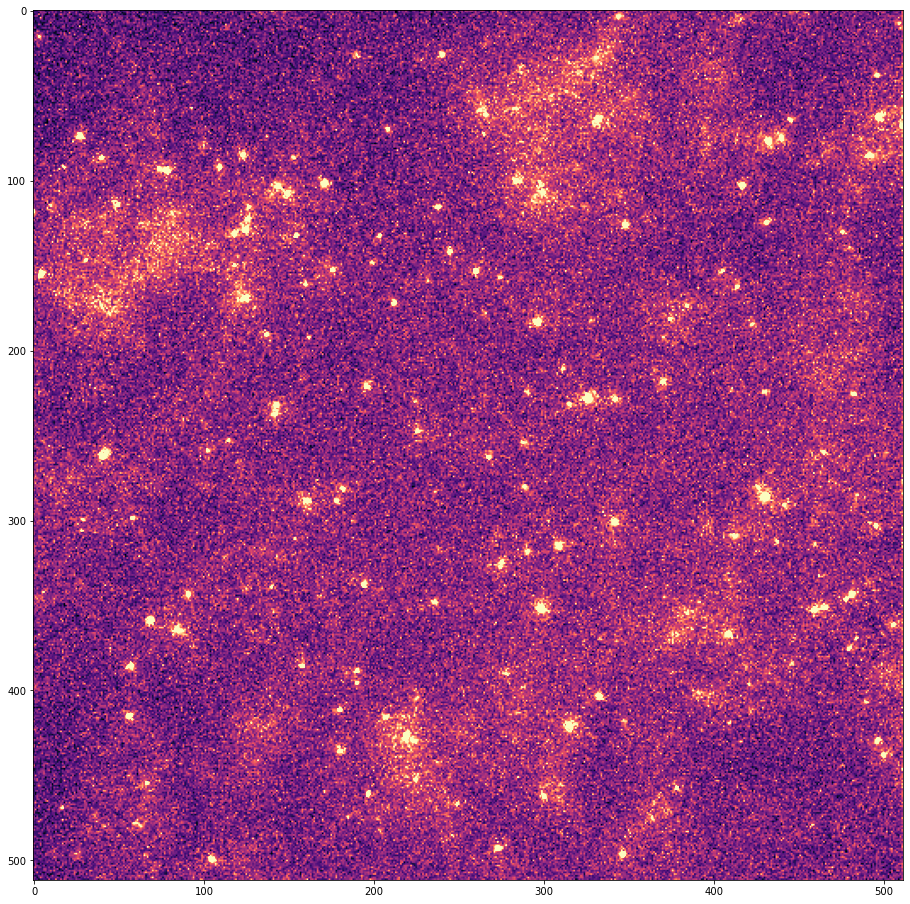

In [7]:
# Let's look at a maximum projection of the volume.
# We have to remove the added extra dimensions to display it.

index = 2
plt.figure(figsize=(32,16))
plt.imshow(imgs[index][0,...,0], 
           cmap='magma',
#            vmin=20000,
#            vmax=22000,
           vmin=np.percentile(imgs[index],0.1),
           vmax=np.percentile(imgs[index],99.1)
          )
plt.show()

In [25]:
# Here we extract patches for training and validation.
patch_shape = (32, 32)
patches = datagen.generate_patches_from_list(imgs[:1], shape=patch_shape)
# X_val = datagen.generate_patches_from_list(imgs[1:], shape=patch_shape)

Generated patches: (2048, 32, 32, 1)


In [28]:
# Patches are created so they do not overlap.
# (Note: this is not the case if you specify a number of patches. See the docstring for details!)
# Non-overlapping patches enable us to split them into a training and validation set.
X = patches[:1700]
X_val = patches[1700:]

In [27]:
# Just in case you don't know how to access the docstring of a method:
datagen.generate_patches_from_list?

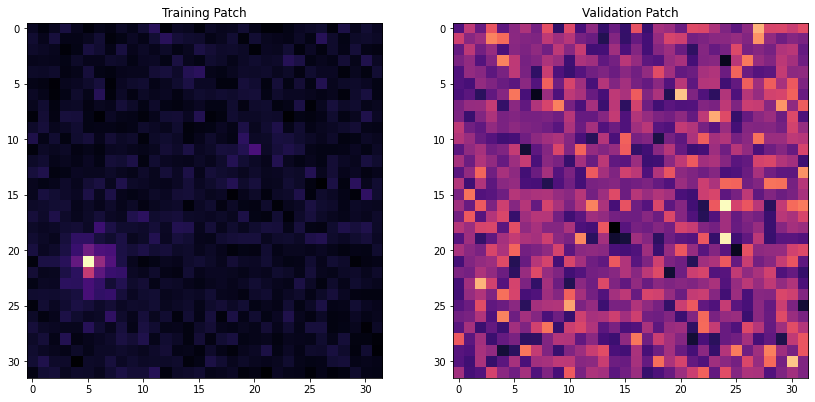

In [29]:
# Let's look at two patches.
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(X[50,...,0], cmap='magma')
plt.title('Training Patch');
plt.subplot(1,2,2)
plt.imshow(X_val[50,...,0], cmap='magma')
plt.title('Validation Patch');

## Configure
Noise2Void comes with a special config-object, where we store network-architecture and training specific parameters. See the docstring of the <code>N2VConfig</code> constructor for a description of all parameters.

When creating the config-object, we provide the training data <code>X</code>. From <code>X</code> we extract <code>mean</code> and <code>std</code> that will be used to normalize all data before it is processed by the network. We also extract the dimensionality and number of channels from <code>X</code>.

Compared to supervised training (i.e. traditional CARE), we recommend to use N2V with an increased <code>train_batch_size</code> and <code>batch_norm</code>.
To keep the network from learning the identity we have to manipulate the input pixels during training. For this we have the parameter <code>n2v_manipulator</code> with default value <code>'uniform_withCP'</code>. Most pixel manipulators will compute the replacement value based on a neighborhood. With <code>n2v_neighborhood_radius</code> we can control its size. 

Other pixel manipulators:
* normal_withoutCP: samples the neighborhood according to a normal gaussian distribution, but without the center pixel
* normal_additive: adds a random number to the original pixel value. The random number is sampled from a gaussian distribution with zero-mean and sigma = <code>n2v_neighborhood_radius</code>
* normal_fitted: uses a random value from a gaussian normal distribution with mean equal to the mean of the neighborhood and standard deviation equal to the standard deviation of the neighborhood.
* identity: performs no pixel manipulation

For faster training multiple pixels per input patch can be manipulated. In our experiments we manipulated about 0.198% of the input pixels per patch. For a patch size of 64 by 64 pixels this corresponds to about 8 pixels. This fraction can be tuned via <code>n2v_perc_pix</code>.

For Noise2Void training it is possible to pass arbitrarily large patches to the training method. From these patches random subpatches of size <code>n2v_patch_shape</code> are extracted during training. Default patch shape is set to (64, 64), but since this is an 3D example we obviously need to specify a triple, here (32, 64, 64).  

In the past we experienced bleedthrough artifacts between channels if training was terminated to early. To counter bleedthrough we added the `single_net_per_channel` option, which is turned on by default. In the back a single U-Net for each channel is created and trained independently, thereby removing the possiblity of bleedthrough. <br/>
__Note:__ Essentially the network gets multiplied by the number of channels, which increases the memory requirements. If your GPU gets too small, you can always split the channels manually and train a network for each channel one after another.

<font color='red'>Warning:</font> to make this example notebook execute faster, we have set <code>train_epochs</code> to only 20. <br>For better results we suggest 100 to 200 <code>train_epochs</code>.

In [30]:
# You can increase "train_steps_per_epoch" to get even better results at the price of longer computation. 
config = N2VConfig(X, unet_kern_size=3, 
#                    train_steps_per_epoch=int(X.shape[0]/128)
                   train_steps_per_epoch=100,
                   train_epochs=100, train_loss='mse', batch_norm=True, 
                   train_batch_size=128, n2v_perc_pix=0.198, n2v_patch_shape=patch_shape, 
                   n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=5)

# Let's look at the parameters stored in the config-object.
vars(config)

{'means': ['1679.3345'],
 'stds': ['251.6402'],
 'n_dim': 2,
 'axes': 'YXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'unet_residual': False,
 'unet_n_depth': 2,
 'unet_kern_size': 3,
 'unet_n_first': 32,
 'unet_last_activation': 'linear',
 'unet_input_shape': (None, None, 1),
 'train_loss': 'mse',
 'train_epochs': 100,
 'train_steps_per_epoch': 100,
 'train_learning_rate': 0.0004,
 'train_batch_size': 128,
 'train_tensorboard': True,
 'train_checkpoint': 'weights_best.h5',
 'train_reduce_lr': {'factor': 0.5, 'patience': 10},
 'batch_norm': True,
 'n2v_perc_pix': 0.198,
 'n2v_patch_shape': (32, 32),
 'n2v_manipulator': 'uniform_withCP',
 'n2v_neighborhood_radius': 5,
 'single_net_per_channel': True,
 'structN2Vmask': None,
 'probabilistic': False}

In [32]:
# a name used to identify the model
model_name = 'n2v_Greg'
# the base directory in which our model will live
basedir = 'models'
# We are now creating our network model.
model = N2V(config=config, name=model_name, basedir=basedir)

In [33]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

## Training

In [34]:
history = model.train(X, X_val)

2 blind-spots will be generated per training patch of size (32, 32).


Preparing validation data: 100%|██████████| 348/348 [00:00<00:00, 5954.54it/s]

Epoch 1/100


100/100 [==============================] - 18s 182ms/step - loss: 0.9162 - n2v_mse: 0.9162 - n2v_abs: 0.7161 - val_loss: 0.8089 - val_n2v_mse: 0.8072 - val_n2v_abs: 0.6529 - lr: 4.0000e-04
Epoch 2/100
100/100 [==============================] - 15s 155ms/step - loss: 0.6894 - n2v_mse: 0.6894 - n2v_abs: 0.6282 - val_loss: 0.7472 - val_n2v_mse: 0.7458 - val_n2v_abs: 0.6427 - lr: 4.0000e-04
Epoch 3/100
100/100 [==============================] - 15s 154ms/step - loss: 0.6939 - n2v_mse: 0.6939 - n2v_abs: 0.6294 - val_loss: 0.7167 - val_n2v_mse: 0.7157 - val_n2v_abs: 0.6388 - lr: 4.0000e-04
Epoch 4/100
100/100 [==============================] - 16s 156ms/step - loss: 0.7077 - n2v_mse: 0.7077 - n2v_abs: 0.6257 - val_loss: 0.7365 - val_n2v_mse: 0.7352 - val_n2v_abs: 0.6456 - lr: 4.0000e-04
Epoch 5/100
100/100 [==============================] - 15s 154ms/step - loss: 0.6400 - n2v_mse: 0.6400 - n2v_abs: 0.6148 - val_loss: 0.7143 - val_n2v_mse: 0.7133 - val_n2v_abs: 0.6390 - lr: 4.0000e-04
Epoch 6

Epoch 42/100
100/100 [==============================] - 7s 74ms/step - loss: 0.6682 - n2v_mse: 0.6682 - n2v_abs: 0.6191 - val_loss: 0.7149 - val_n2v_mse: 0.7151 - val_n2v_abs: 0.6372 - lr: 4.0000e-04
Epoch 43/100
100/100 [==============================] - 7s 74ms/step - loss: 0.6474 - n2v_mse: 0.6474 - n2v_abs: 0.6112 - val_loss: 0.6531 - val_n2v_mse: 0.6529 - val_n2v_abs: 0.6287 - lr: 4.0000e-04
Epoch 44/100
100/100 [==============================] - 7s 74ms/step - loss: 0.6413 - n2v_mse: 0.6413 - n2v_abs: 0.6118 - val_loss: 0.6655 - val_n2v_mse: 0.6652 - val_n2v_abs: 0.6269 - lr: 4.0000e-04
Epoch 45/100
100/100 [==============================] - 7s 74ms/step - loss: 0.6264 - n2v_mse: 0.6264 - n2v_abs: 0.6111 - val_loss: 0.6573 - val_n2v_mse: 0.6572 - val_n2v_abs: 0.6263 - lr: 4.0000e-04
Epoch 46/100
100/100 [==============================] - 7s 74ms/step - loss: 0.6266 - n2v_mse: 0.6266 - n2v_abs: 0.6097 - val_loss: 0.6501 - val_n2v_mse: 0.6499 - val_n2v_abs: 0.6225 - lr: 4.0000e-04


100/100 [==============================] - 7s 74ms/step - loss: 0.6174 - n2v_mse: 0.6174 - n2v_abs: 0.6057 - val_loss: 0.6392 - val_n2v_mse: 0.6393 - val_n2v_abs: 0.6244 - lr: 5.0000e-05
Epoch 81/100
100/100 [==============================] - 7s 74ms/step - loss: 0.6106 - n2v_mse: 0.6106 - n2v_abs: 0.6049 - val_loss: 0.6389 - val_n2v_mse: 0.6390 - val_n2v_abs: 0.6243 - lr: 5.0000e-05
Epoch 82/100
100/100 [==============================] - 7s 74ms/step - loss: 0.6166 - n2v_mse: 0.6166 - n2v_abs: 0.6081 - val_loss: 0.6370 - val_n2v_mse: 0.6371 - val_n2v_abs: 0.6228 - lr: 5.0000e-05
Epoch 83/100
100/100 [==============================] - 7s 74ms/step - loss: 0.6145 - n2v_mse: 0.6145 - n2v_abs: 0.6076 - val_loss: 0.6362 - val_n2v_mse: 0.6364 - val_n2v_abs: 0.6243 - lr: 5.0000e-05
Epoch 84/100
100/100 [==============================] - 7s 74ms/step - loss: 0.6122 - n2v_mse: 0.6122 - n2v_abs: 0.6069 - val_loss: 0.6415 - val_n2v_mse: 0.6418 - val_n2v_abs: 0.6266 - lr: 5.0000e-05
Epoch 85/100


### After training, lets plot training and validation loss.

['loss', 'lr', 'n2v_abs', 'n2v_mse', 'val_loss', 'val_n2v_abs', 'val_n2v_mse']


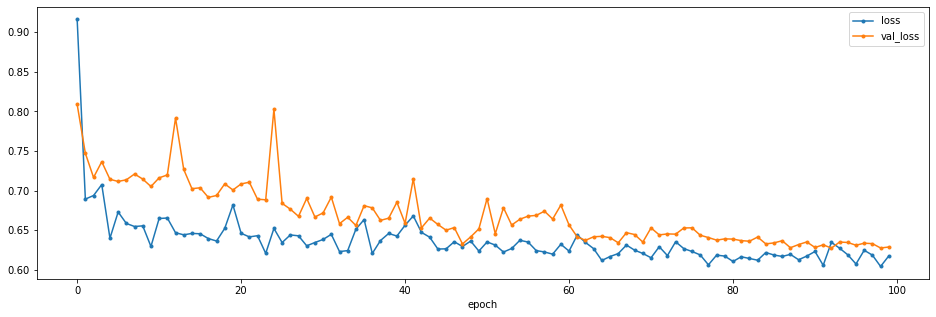

In [35]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss']);

## Export Model in BioImage ModelZoo Format
See https://imagej.net/N2V#Prediction for details.

In [36]:
model.export_TF(name='Noise2Void - Greg Example', 
                description='Noise2Void Greg', 
                authors=["João Mamede"],
                test_img=X_val[0,...,0], axes='YX',
                patch_shape=patch_shape)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /tmp/tmpusw9o3b9/model/saved_model.pb


/home/jmamede/anaconda3/lib/python3.7/site-packages/csbdeep/utils/tf.py:189: UserWarning: 
***IMPORTANT NOTE***

You are using 'tensorflow' 2.x, hence it is likely that the exported model *will not work*
in associated ImageJ/Fiji plugins (e.g. CSBDeep and StarDist).

If you indeed have problems loading the exported model in Fiji, the current workaround is
to load the trained model in a Python environment with installed 'tensorflow' 1.x and then
export it again. If you need help with this, please read:

https://gist.github.com/uschmidt83/4b747862fe307044c722d6d1009f6183

  """)



Model exported in BioImage ModelZoo format:
/home/jmamede/scripts/notebooks/n2v/models/n2v_Greg/export.bioimage.io.zip
